In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Define global plot aesthetics
sns.set_style("whitegrid")

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    # Impute missing numerical values with the mean
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    # Impute missing categorical values with the mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df


In [35]:
# Load the dataset
file_path = 'weather_test_data.csv'
df = load_and_preprocess_data(file_path)


In [36]:
# Display basic properties and any other descriptive information
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42677 non-null  float64
 3   MaxTemp        42677 non-null  float64
 4   Rainfall       42677 non-null  float64
 5   Evaporation    42677 non-null  float64
 6   Sunshine       42677 non-null  float64
 7   WindGustDir    42677 non-null  object 
 8   WindGustSpeed  42677 non-null  float64
 9   WindDir9am     42677 non-null  object 
 10  WindDir3pm     42677 non-null  object 
 11  WindSpeed9am   42677 non-null  float64
 12  WindSpeed3pm   42677 non-null  float64
 13  Humidity9am    42677 non-null  float64
 14  Humidity3pm    42677 non-null  float64
 15  Pressure9am    42677 non-null  float64
 16  Pressure3pm    42677 non-null  float64
 17  Cloud9am       42677 non-null  float64
 18  Cloud3

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000,42677.000000
mean,12.210032,23.246068,2.342862,5.489715,7.647831,40.001379,13.995315,18.607516,68.791176,51.597672,1017.581591,1015.192792,4.412041,4.466054,17.028266,21.700982
std,6.417485,7.115914,8.369916,3.210360,2.723477,13.153646,8.829409,8.724499,18.875325,20.573142,6.730166,6.658307,2.279616,2.113478,6.479642,6.884154
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,982.200000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,4.000000,7.647831,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.489715,7.647831,39.000000,13.000000,18.607516,70.000000,51.597672,1017.581591,1015.192792,4.412041,4.466054,16.800000,21.300000
75%,16.900000,28.300000,0.800000,5.489715,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.300000,6.000000,6.000000,21.600000,26.300000
max,31.800000,47.000000,278.400000,145.000000,14.300000,122.000000,74.000000,83.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,8.000000,39.400000,45.400000


In [37]:
# Function to plot a scatter plot
def plot_scatter(data, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue=hue, data=data, palette='Set1', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Function to plot a violin plot
def plot_violin(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


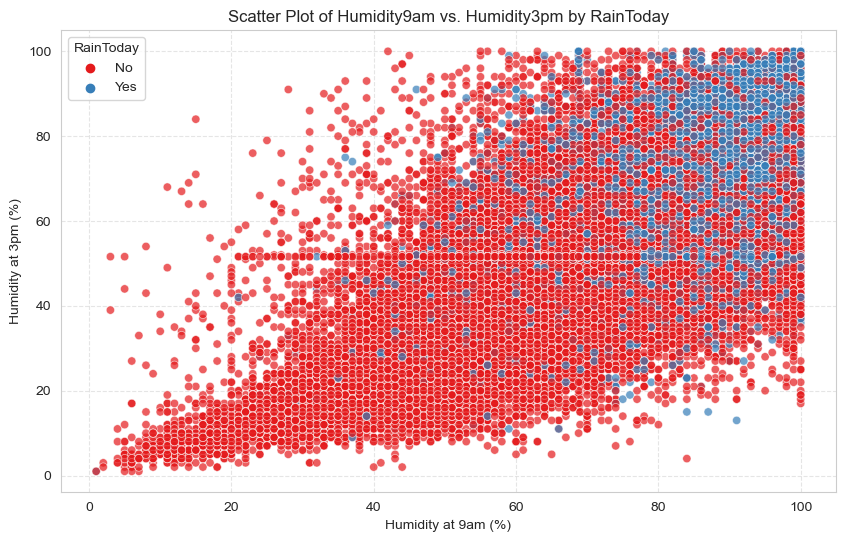

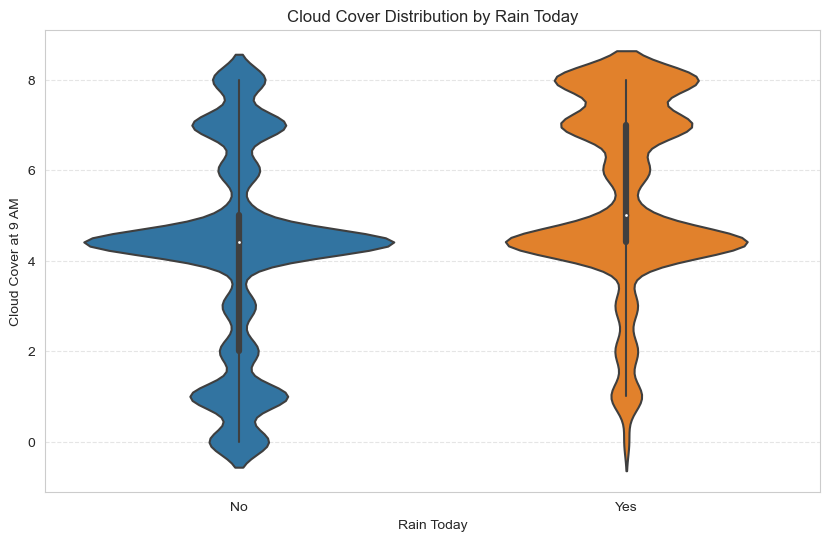

In [38]:
# creating a scatter plot
plot_scatter(df, 'Humidity9am', 'Humidity3pm', 'RainToday', 
             'Scatter Plot of Humidity9am vs. Humidity3pm by RainToday', 
             'Humidity at 9am (%)', 'Humidity at 3pm (%)')

# creating a violin plot
plot_violin(df, 'RainToday', 'Cloud9am', 
            'Cloud Cover Distribution by Rain Today', 
            'Rain Today', 'Cloud Cover at 9 AM')


In [39]:
# Function to create box plots
def plot_box(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Function to create scatter plot with regression line
def plot_regression(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


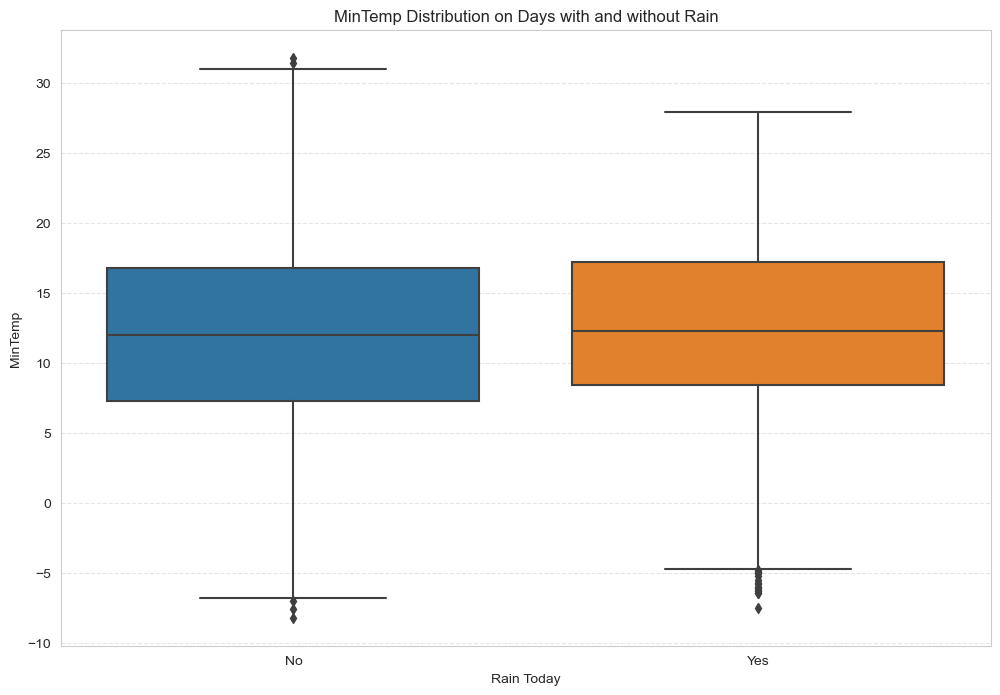

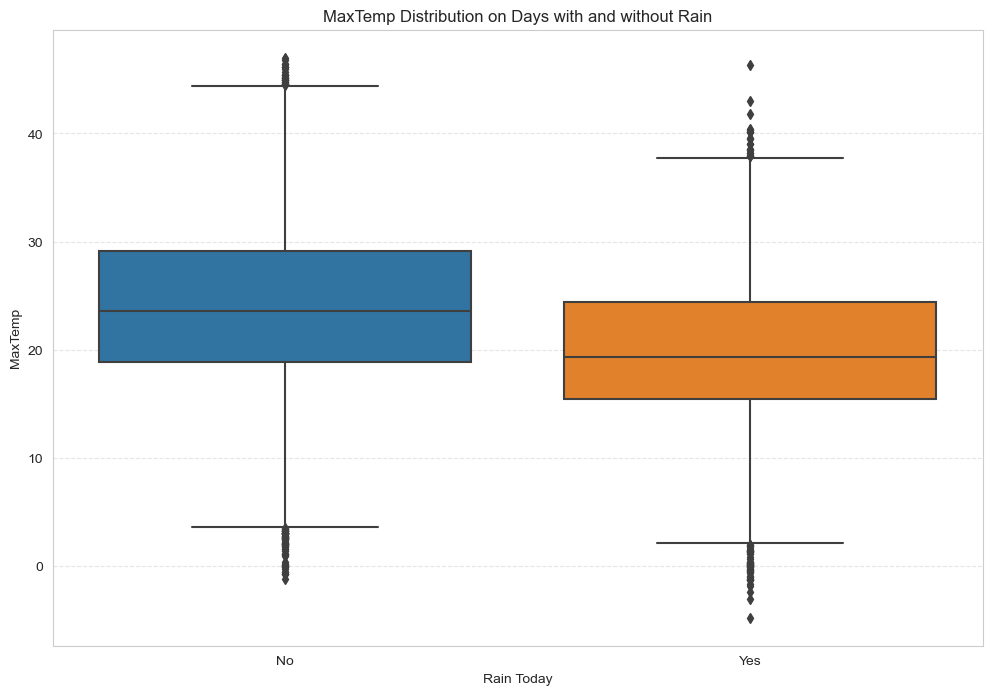

In [40]:
# Select the weather metrics of interest for comparison
weather_metrics = ['MinTemp', 'MaxTemp']

# Plot side-by-side box plots for each metric
for metric in weather_metrics:
    plot_box(df, 'RainToday', metric, f'{metric} Distribution on Days with and without Rain', 'Rain Today', metric)


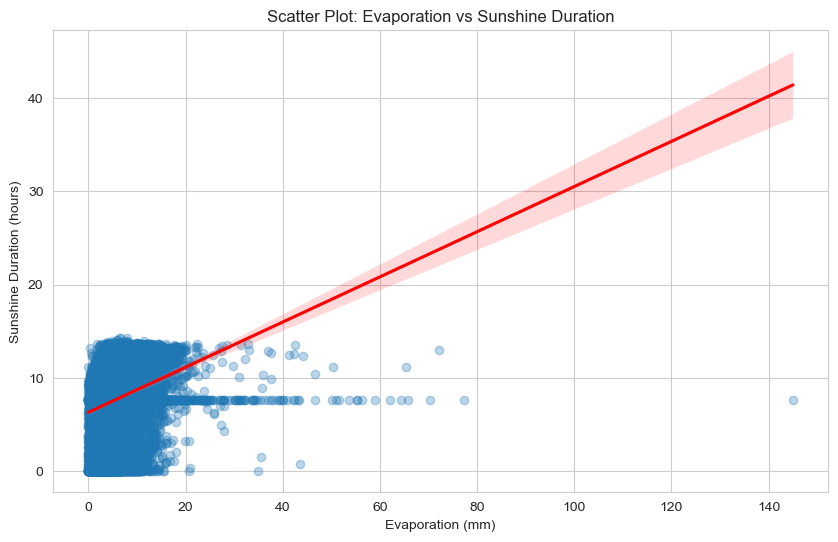

In [41]:
# Plotting Evaporation vs. Sunshine with a regression line
plot_regression(df, 'Evaporation', 'Sunshine', 'Scatter Plot: Evaporation vs Sunshine Duration', 'Evaporation (mm)', 'Sunshine Duration (hours)')


c:\Users\aakpk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


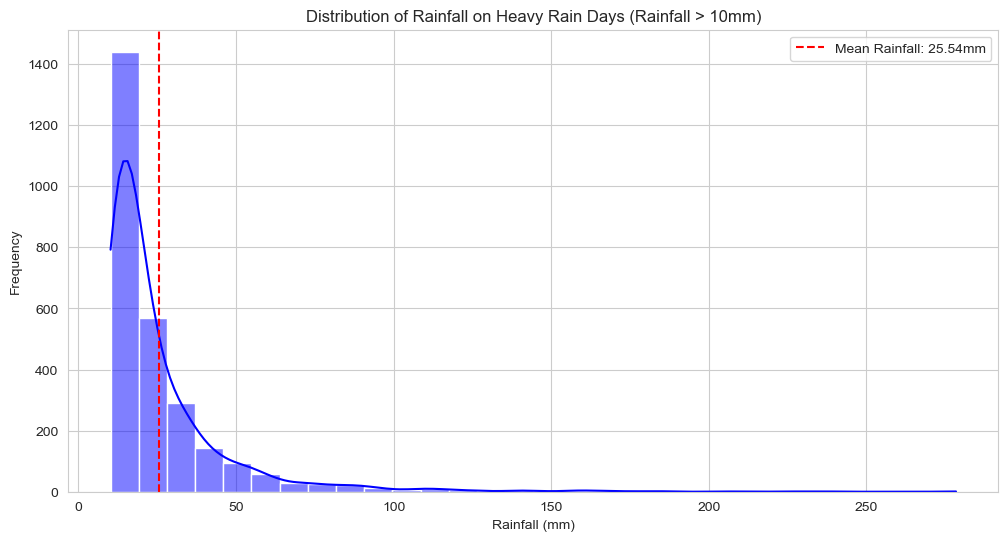

In [42]:
# Define a threshold for heavy rain
heavy_rain_threshold = 10.0

# Calculate the number of days with heavy rain and create a histogram
heavy_rain_days = df[df['Rainfall'] > heavy_rain_threshold]
plt.figure(figsize=(12, 6))
sns.histplot(heavy_rain_days['Rainfall'], bins=30, kde=True, color='blue')
plt.title('Distribution of Rainfall on Heavy Rain Days (Rainfall > 10mm)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.axvline(heavy_rain_days['Rainfall'].mean(), color='red', linestyle='--', label=f"Mean Rainfall: {heavy_rain_days['Rainfall'].mean():.2f}mm")
plt.legend()
plt.show()
